<a href="https://colab.research.google.com/github/HaHyunkyung/Prediction-of-disabled-call-taxi-waiting-time/blob/main/4_%ED%8C%8C%EC%83%9D%EB%B3%80%EC%88%98_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### 2. 데이터 로딩

In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/장애인 콜택시 대기시간 예측/data3.csv')

In [ ]:
data3.isna().sum()

,0
Date,0
Car_count,0
Register,0
Boarding,0
Wait_time,0
Average_mean,0
Riding_mean,0
Month,0
Year,0
waiting_time,0


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916 entries, 0 to 2915
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2916 non-null   object 
 1   Car_count              2916 non-null   int64  
 2   Register               2916 non-null   int64  
 3   Boarding               2916 non-null   int64  
 4   Wait_time              2916 non-null   float64
 5   Average_mean           2916 non-null   int64  
 6   Riding_mean            2916 non-null   int64  
 7   Month                  2916 non-null   int64  
 8   Year                   2916 non-null   int64  
 9   waiting_time           2916 non-null   float64
 10  temp_max               2916 non-null   float64
 11  temp_min               2916 non-null   float64
 12  rain(mm)               2916 non-null   float64
 13  humidity_max(%)        2916 non-null   float64
 14  humidity_min(%)        2916 non-null   float64
 15  suns

In [ ]:
data3.describe()

,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,temp_max,...,Total_wait,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,season_Spring,season_Summer,season_Winter
count,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,...,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000
mean,418.919067,3928.127229,3285.638546,40.337037,2304.340535,9253.533265,6.533608,2018.505144,40.340261,18.110802,...,164636.434294,0.142661,0.142661,0.142661,0.143004,0.143004,0.143004,0.252401,0.252401,0.245199
std,133.719577,1509.300543,1248.972391,14.094318,107.382826,1020.053563,3.442829,2.287630,14.091722,10.691353,...,91253.836796,0.349787,0.349787,0.349787,0.350137,0.350137,0.350137,0.434464,0.434464,0.430279
min,132.000000,527.000000,462.000000,17.600000,2131.000000,7672.000000,1.000000,2015.000000,17.600000,-11.200000,...,11107.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,278.000000,2163.500000,1779.000000,29.700000,2228.000000,8519.000000,4.000000,2017.000000,29.700000,9.100000,...,86582.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,455.000000,4722.500000,3935.000000,38.250000,2257.000000,8821.500000,7.000000,2019.000000,38.250000,19.700000,...,157253.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,522.000000,5110.000000,4241.250000,48.700000,2401.000000,10151.000000,10.000000,2020.250000,48.700000,27.400000,...,231793.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000,12.000000,2022.000000,96.100000,39.400000,...,464160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. 상관계수 분석

In [ ]:
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(20, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

In [ ]:
data3.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Month', 'Year', 'waiting_time',
       'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'month', 'holiday',
       '7_day_wait_time_mean', 'Boarding_rate', 'Cancel', 'Total_wait',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,temp_max,...,Total_wait,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,season_Spring,season_Summer,season_Winter
Car_count,1.0,0.885658,0.904507,0.034373,-0.844972,-0.857641,0.129840,0.242103,0.086246,0.099777,...,0.598617,0.202133,-0.477851,-0.592165,0.231701,0.231540,0.201067,-0.041248,0.066215,-0.129503
Register,0.0,1.000000,0.988743,0.290964,-0.850885,-0.847939,0.086950,-0.001155,0.315238,0.049166,...,0.807321,0.213019,-0.502324,-0.601515,0.227795,0.234750,0.219591,-0.028436,0.042706,-0.068049
Boarding,0.0,0.000000,1.000000,0.183438,-0.868364,-0.858737,0.058219,-0.000623,0.228258,0.055465,...,0.729787,0.220875,-0.519927,-0.585430,0.228947,0.240656,0.219608,-0.008380,0.047268,-0.075938
Wait_time,0.0,0.000000,0.000000,1.000000,0.019400,-0.013406,0.279756,-0.129757,0.731728,0.041399,...,0.756692,-0.030757,0.092867,-0.156580,0.021727,0.014220,0.038821,-0.069410,-0.028183,-0.077508
Average_mean,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.977662,0.051835,-0.108537,-0.049410,0.096739,...,-0.551316,-0.243990,0.477569,0.608977,-0.184087,-0.230875,-0.205146,0.027893,-0.050300,-0.092522
Riding_mean,-0.0,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.035220,-0.217162,-0.083864,0.100134,...,-0.572260,-0.238771,0.472322,0.594848,-0.188799,-0.229802,-0.200864,0.027445,-0.036586,-0.082217
Month,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.005924,0.272971,0.211403,...,0.221257,-0.000564,-0.001419,-0.000849,0.002699,0.000992,-0.001000,-0.427670,0.080561,-0.234710
Year,0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.129607,-0.016105,...,-0.035952,0.000369,-0.000489,-0.000060,-0.000276,0.000152,-0.000276,-0.001307,-0.001307,0.004469
waiting_time,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000,0.045457,...,0.653631,0.015266,-0.156702,-0.030856,0.019517,0.038728,0.021638,-0.063823,-0.028041,-0.088498
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,...,0.056835,-0.000486,0.012595,0.005413,-0.002905,-0.007717,-0.009165,0.023748,0.627165,-0.754855


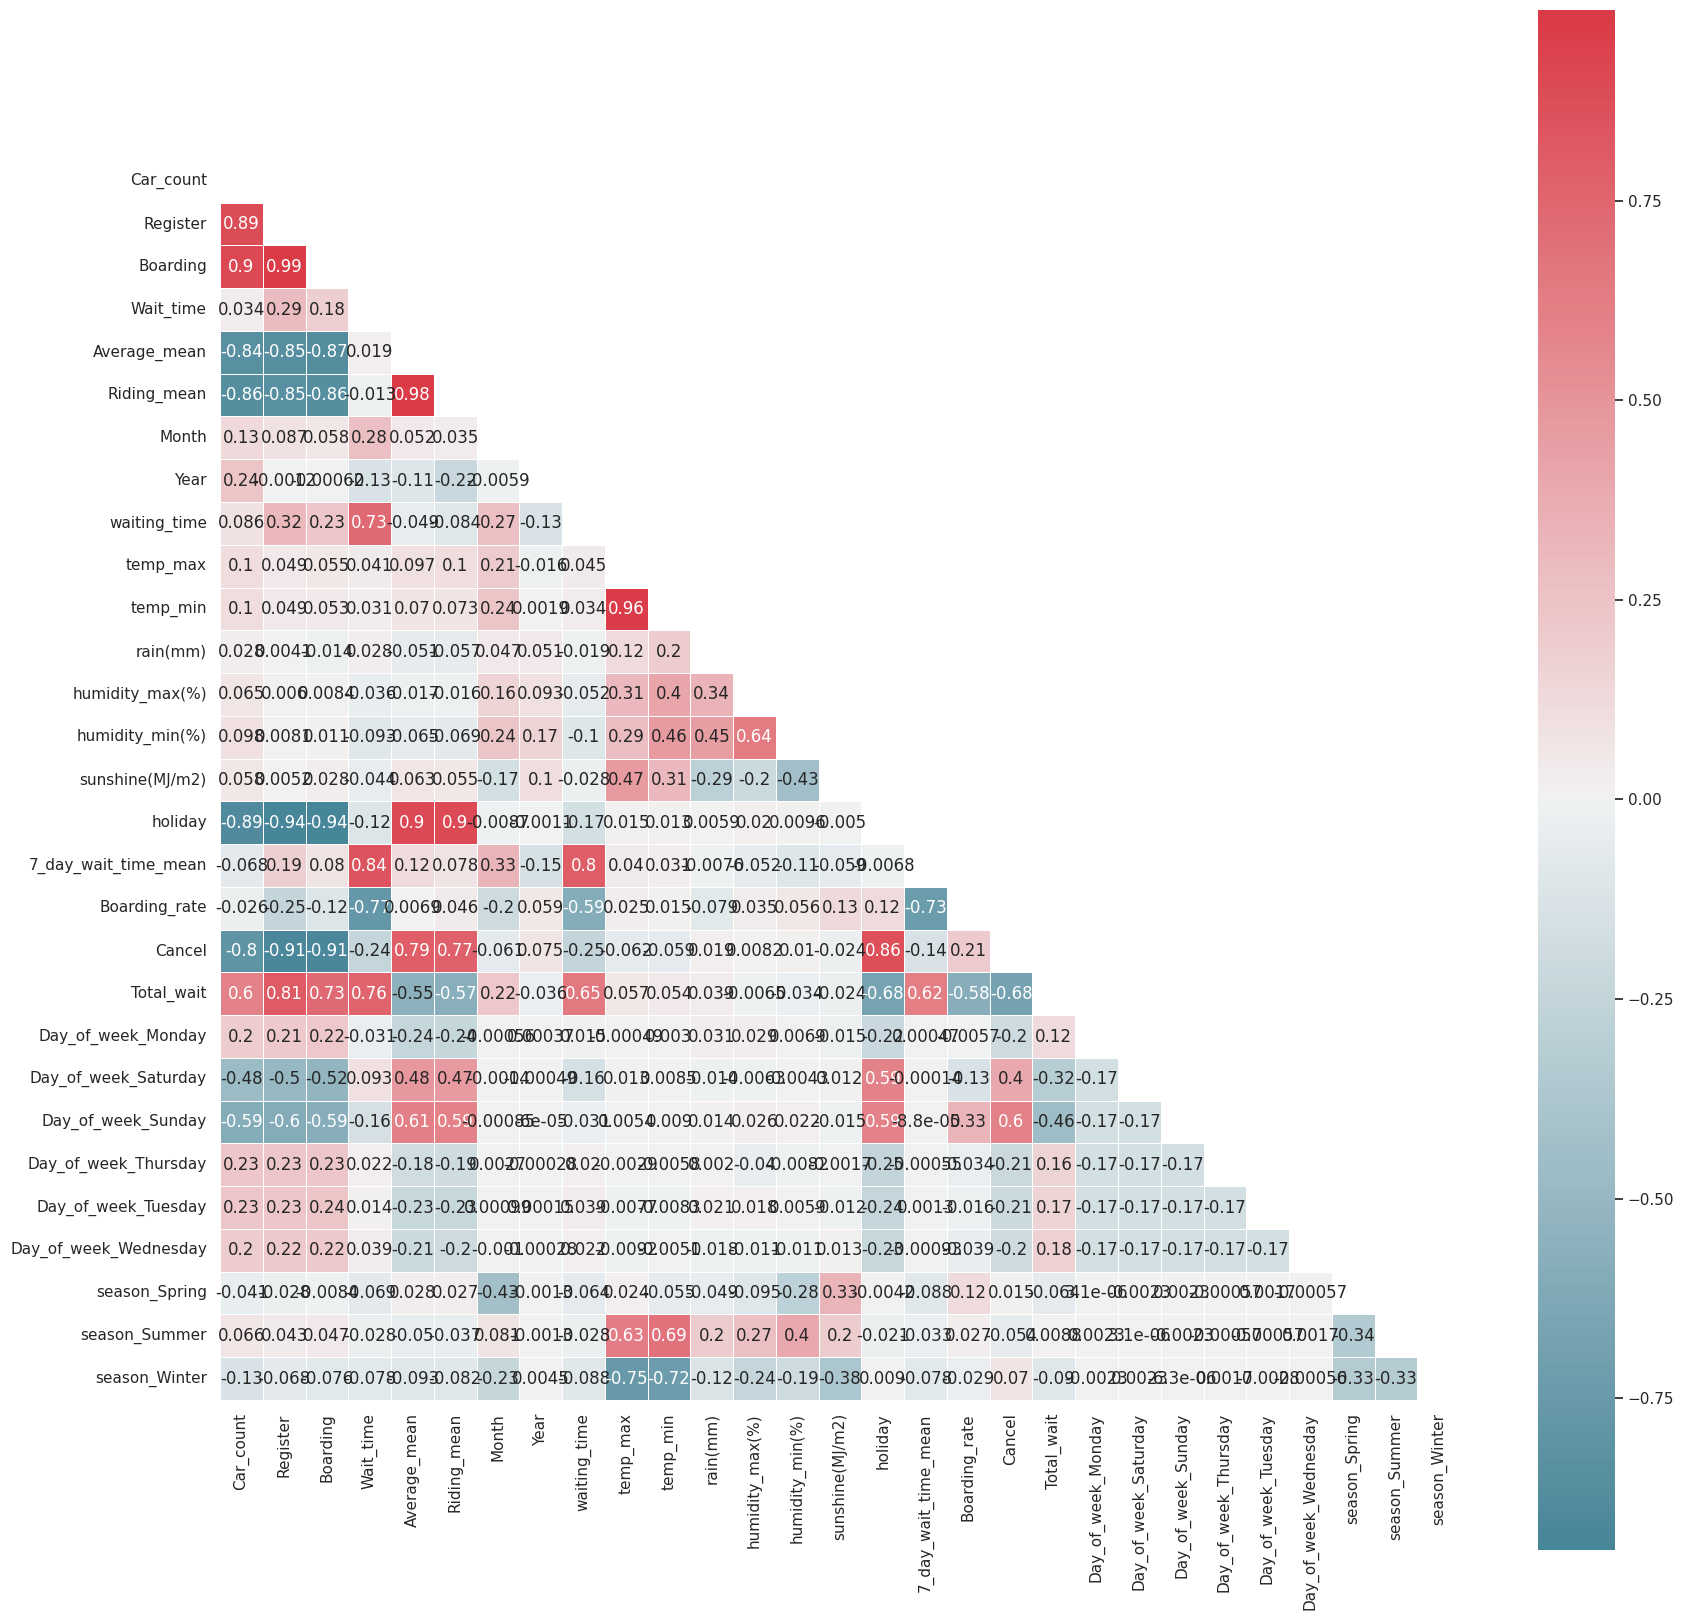

In [ ]:
num_vars = ['Car_count', 'Register', 'Boarding', 'Wait_time', 'Average_mean',
       'Riding_mean', 'Month', 'Year', 'waiting_time', 'temp_max', 'temp_min',
       'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'holiday', '7_day_wait_time_mean', 'Boarding_rate', 'Cancel',
       'Total_wait', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'season_Spring', 'season_Summer',
       'season_Winter']

eda_2_corr(data3, num_vars)

**만들 수 있는 파생변수**

* boarding_rate->	Boarding / Register (승차율)

* waiting_vs_riding -> Wait_time - Riding_mean (대기 시간과 실제 이동 시간 차이)

* temp_diff -> temp_max - temp_min (일교차)

* humidity_diff ->	humidity_max - humidity_min (습도 차이)

* rain_effect -> rain(mm) * humidity_max (비와 습도의 결합 영향)

* cancel_rate -> Cancel / Register (취소율)

* high_wait_cancel -> Cancel / Total_wait (대기 시간이 긴 경우 취소율)

* 강수 유무

* 택시 기본요금

* 코로나

* 3일 이동평균 대기시간

* 5일 이동평균 대기시간

### 파생변수 생성

In [ ]:
df4 = data3.copy()

In [ ]:
df4['boarding_rate'] = df4['Boarding'] / df4['Register']
df4['Waiting_vs_riding'] = df4['Wait_time'] - df4['Riding_mean']
df4['temp_diff'] = df4['temp_max'] - df4['temp_min']
df4['humidity_diff'] = df4['humidity_max(%)'] - df4['humidity_min(%)']
df4['rain_effect'] = df4['rain(mm)'] * df4['humidity_max(%)']
df4['cancel_rate'] = df4['Cancel'] / df4['Register']
df4['high_wait_cancel'] = df4['Cancel'] / df4['Total_wait']

In [ ]:
#코로나

start_date = '2020-01-20'
end_date = '2023-05-11'

df4['covid'] = 0
df4.loc[(df4['Date'] >= start_date) & (df4['Date'] <= end_date), 'covid'] = 1

In [ ]:
# 3일 이동평균 대기시간

df4['wt_ma3'] = df4['waiting_time'].rolling(3, min_periods = 1).mean()

In [ ]:
# 5일 이동평균 대기시간

df4['wt_ma5'] = df4['waiting_time'].rolling(5, min_periods = 1).mean()

In [ ]:
# 강수 유무

def add_rain_yn(rain):
    if rain > 0:          return 1
    else:
        return 0

df4['rain_yn'] = df4['rain(mm)'].apply(add_rain_yn)

In [ ]:
# 택시 기본요금

def add_basic_fare(year):
    if 2012 == year:
        return 2400
    elif 2013 <= year <2019:
        return 3000
    elif year >= 2019:
        return 3800
    else:  # 나머지 경우는 0으로 처리
        return 0

df4['taxi_base_rate'] = df4['Year'].apply(add_basic_fare)

In [ ]:
df4.head()

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Month,Year,waiting_time,...,temp_diff,humidity_diff,rain_effect,cancel_rate,high_wait_cancel,covid,wt_ma3,wt_ma5,rain_yn,taxi_base_rate
0,2015-01-07,410,4085,3676,24.7,2230,8646,1,2015,21.2,...,7.8,18.0,0.0,6.659359e-08,2.696097e-09,0,21.200000,21.200000,0,3000
1,2015-01-08,419,4030,3728,21.2,2231,8683,1,2015,21.8,...,9.0,35.0,0.0,6.656088e-08,3.139664e-09,0,21.500000,21.500000,0,3000
2,2015-01-09,424,4167,3813,21.8,2215,8506,1,2015,41.2,...,10.0,40.0,0.0,6.293753e-08,2.887043e-09,0,28.066667,28.066667,0,3000
3,2015-01-10,215,1916,1645,41.2,2447,11123,1,2015,28.8,...,9.8,48.0,0.0,3.172770e-07,7.700898e-09,0,30.600000,28.250000,0,3000
4,2015-01-11,187,1700,1572,28.8,2419,10806,1,2015,23.2,...,6.3,44.0,0.0,3.741955e-07,1.299290e-08,0,31.066667,27.240000,0,3000


### 파생변수 상관계수 분석

In [ ]:
derived_features = ['boarding_rate', 'Waiting_vs_riding', 'temp_diff', 'cancel_rate','humidity_diff','rain_effect','high_wait_cancel','covid','wt_ma3','wt_ma5','rain_yn','taxi_base_rate']
target = 'waiting_time'
correlation = df4[derived_features+[target]].corr()

# 타깃 변수와의 상관계수 출력
print(correlation[target].sort_values(ascending=False))

waiting_time         1.000000
wt_ma3               0.890504
wt_ma5               0.858425
Waiting_vs_riding    0.093949
humidity_diff        0.069916
temp_diff            0.041027
rain_effect         -0.018995
rain_yn             -0.027137
taxi_base_rate      -0.207650
cancel_rate         -0.249892
high_wait_cancel    -0.285567
covid               -0.457448
boarding_rate       -0.587257
Name: waiting_time, dtype: float64


절댓값이 0.2 이하인 피쳐들은 삭제

In [ ]:
df4 = df4.drop(columns = {'Waiting_vs_riding','humidity_diff','temp_diff',
                          'rain_effect','rain_yn'})

In [ ]:
df4.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Month', 'Year', 'waiting_time',
       'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'month', 'holiday',
       '7_day_wait_time_mean', 'Boarding_rate', 'Cancel', 'Total_wait',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter', 'boarding_rate',
       'cancel_rate', 'high_wait_cancel', 'covid', 'wt_ma3', 'wt_ma5',
       'taxi_base_rate'],
      dtype='object')

In [ ]:
derived_features = ['Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Month', 'Year',
       'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'month', 'holiday',
       '7_day_wait_time_mean', 'Boarding_rate', 'Cancel', 'Total_wait',
       'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
       'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter', 'boarding_rate',
       'cancel_rate', 'high_wait_cancel', 'covid', 'wt_ma3', 'wt_ma5',
       'taxi_base_rate']
target = 'waiting_time'
correlation = df4[derived_features+[target]].corr()

# 타깃 변수와의 상관계수 출력
print(correlation[target].sort_values(ascending=False))

waiting_time             1.000000
wt_ma3                   0.890504
wt_ma5                   0.858425
7_day_wait_time_mean     0.799435
Wait_time                0.731728
Total_wait               0.653631
Register                 0.315238
month                    0.272971
Month                    0.272971
Boarding                 0.228258
Car_count                0.086246
temp_max                 0.045457
Day_of_week_Tuesday      0.038728
temp_min                 0.033781
Day_of_week_Wednesday    0.021638
Day_of_week_Thursday     0.019517
Day_of_week_Monday       0.015266
rain(mm)                -0.018547
sunshine(MJ/m2)         -0.027910
season_Summer           -0.028041
Day_of_week_Sunday      -0.030856
Average_mean            -0.049410
humidity_max(%)         -0.052486
season_Spring           -0.063823
Riding_mean             -0.083864
season_Winter           -0.088498
humidity_min(%)         -0.100686
Year                    -0.129607
Day_of_week_Saturday    -0.156702
holiday       

In [ ]:
df4 = df4.drop(columns = {'Date'})

In [ ]:
df4.to_csv('data4.csv', index=False)

### 모델링

In [ ]:
pip install numpy==1.23.5

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.9 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [ ]:
target = 'waiting_time'

x = df4.drop(target, axis=1)
y = df4[target]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=False)

In [ ]:
# MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)


### 1. LinearRegression

Linear MAE: 3.099907901412504
Linear MAPE: 0.09092002685461992
R2: 0.7908398114282967
평균 : 41.34819897084048


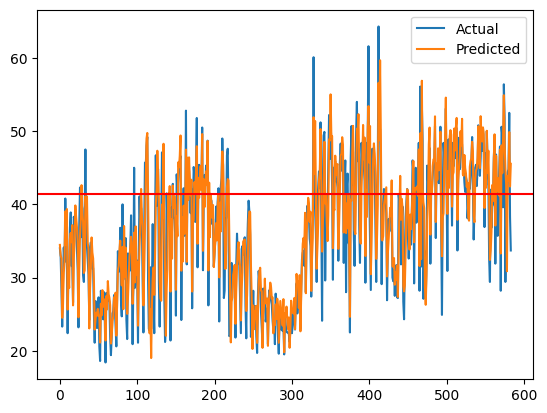

In [ ]:
lr_model = LinearRegression()

lr_model.fit(x_train_sc, y_train)

y_pred = lr_model.predict(x_test_sc)

print('Linear MAE:',mean_absolute_error(y_test, y_pred))
print('Linear MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE = {}
result_MAPE = {}
result_r2 = {}
result_MAE['Linear Regression'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['Linear Regression'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['Linear Regression'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

## KNN

MAE: 7.942397260273972
MAPE: 0.2034916333303787
R2: -0.22778336484738237
평균 : 41.34819897084048


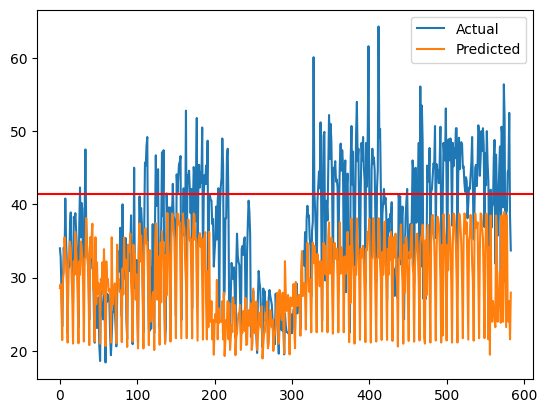

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(x_train_sc, y_train)

y_pred = knn_model.predict(x_test_sc)

print('MAE:',mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['KNN'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['KNN'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['KNN'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

### Decision Tree

MAE: 3.6143071060423764
MAPE: 0.10524344547781665
R2: 0.7040552383542578


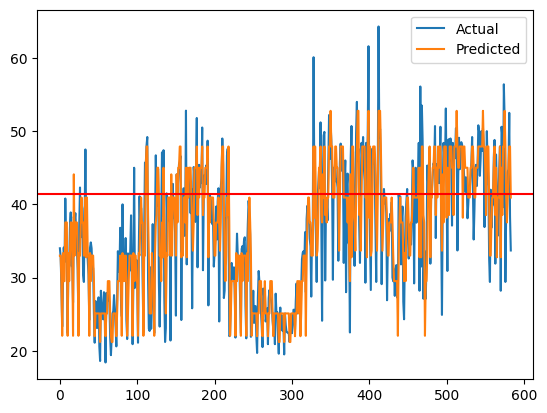

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=5)

dt_model.fit(x_train_sc, y_train)

y_pred = dt_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['DecisionTreeRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['DecisionTreeRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['DecisionTreeRegressor'] = round(r2_score(y_test, y_pred), 3)

plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

### RandomForest

Random MAE: 3.455754555875804
Random MAPE: 0.10208150545091117
R2: 0.7358694559191263
평균 : 41.34819897084048


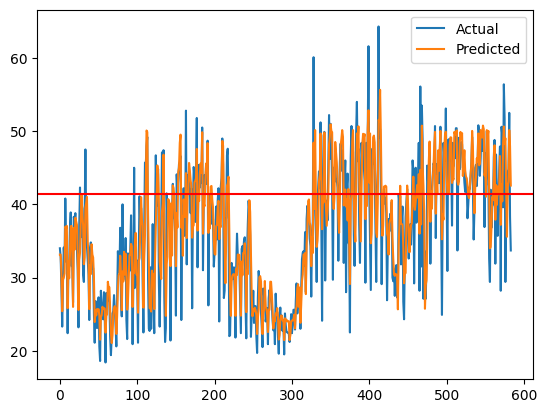

In [ ]:
rf_model = RandomForestRegressor(max_depth=5, random_state = 1)

rf_model.fit(x_train_sc, y_train)

y_pred = rf_model.predict(x_test_sc)

print('Random MAE:', mean_absolute_error(y_test, y_pred))
print('Random MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['RF'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['RF'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['RF'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

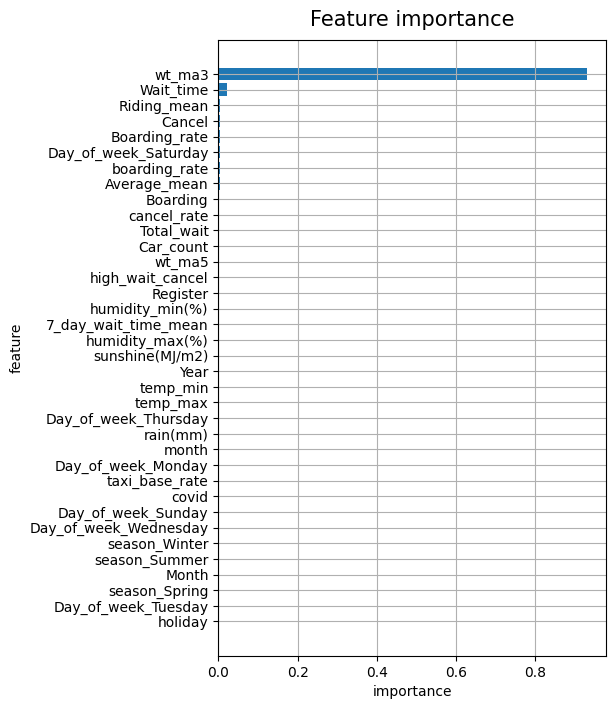

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = rf_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)

plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

### 3. XGB

XGB MAE: 3.4935227126291353
XGB MAPE: 0.09950200546165912
XGB R2: 0.7126474542130607
평균 : 41.34819897084048


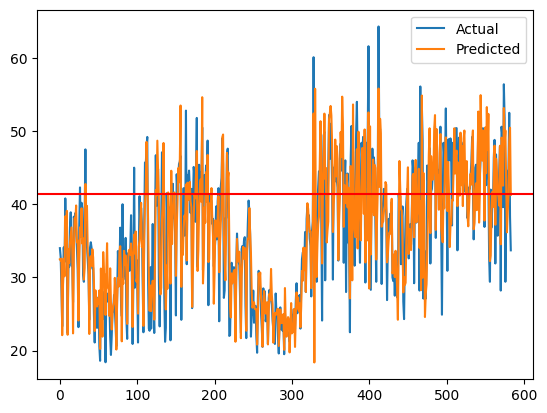

In [ ]:
xg_model = XGBRegressor(max_depth=5, random_state=1)

xg_model.fit(x_train_sc, y_train)

y_pred = xg_model.predict(x_test_sc)

print('XGB MAE:', mean_absolute_error(y_test, y_pred))
print('XGB MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('XGB R2:', r2_score(y_test, y_pred))

result_MAE['XGB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['XGB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['XGB'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

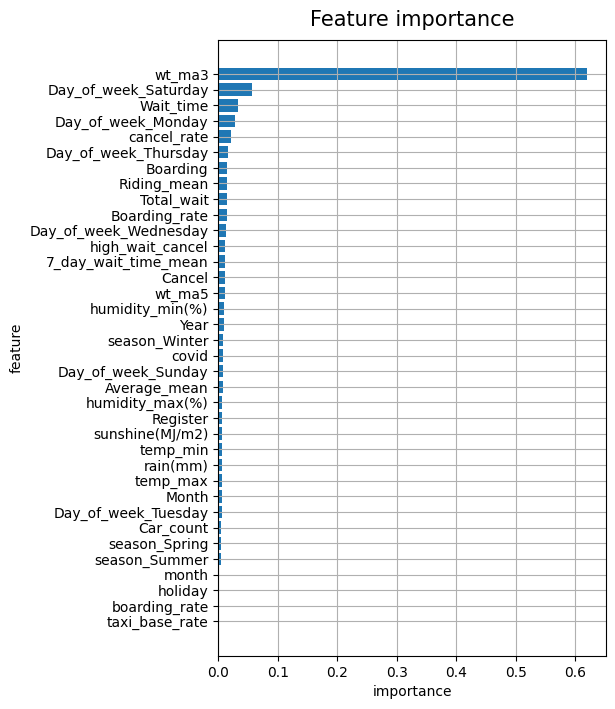

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = xg_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)


plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

### 4. LGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Light MAE: 3.0534974034598723
Light MAPE: 0.08937089650652678
R2: 0.7853560224108183
평균 : 41.34819897084048


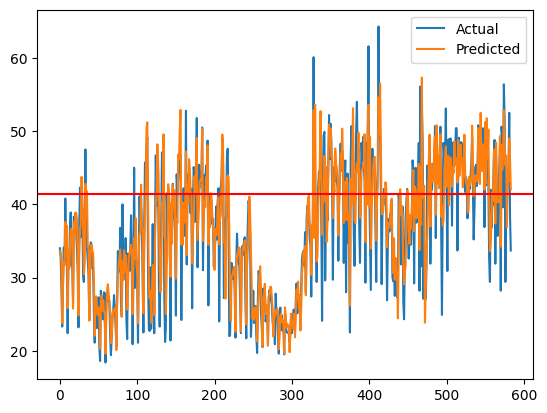

In [ ]:
lg_model = LGBMRegressor(max_depth=5, verbose=-1)

lg_model.fit(x_train_sc, y_train)

y_pred = lg_model.predict(x_test_sc)

print('Light MAE:', mean_absolute_error(y_test, y_pred))
print('Light MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['LGB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['LGB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['LGB'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

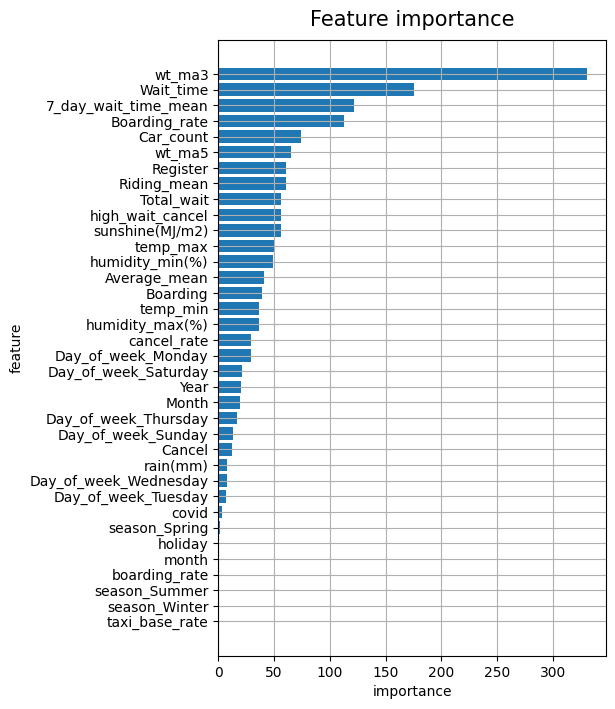

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = lg_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)


plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

### 5. Ridge

Ridge MAE: 3.207900932873132
Ridge MAPE: 0.09584285847151025
R2: 0.7739852951079784
평균 : 41.34819897084048


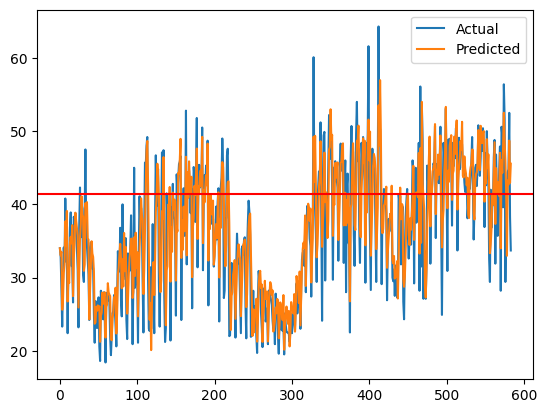

In [ ]:
rd_model = Ridge()

rd_model.fit(x_train_sc, y_train)

y_pred = rd_model.predict(x_test_sc)

print('Ridge MAE:', mean_absolute_error(y_test, y_pred))
print('Ridge MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['RID'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['RID'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['RID'] = round(r2_score(y_test, y_pred), 3)

y_mean = y_train.mean()
print('평균 :',y_mean)
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.legend()
plt.axhline(y_mean, color = 'r') #평균선
plt.show()

### 6. Cat

Learning rate set to 0.046804
0:	learn: 14.4625650	total: 57ms	remaining: 56.9s
1:	learn: 13.9931925	total: 62.1ms	remaining: 31s
2:	learn: 13.5578229	total: 67.3ms	remaining: 22.4s
3:	learn: 13.1390206	total: 72.2ms	remaining: 18s
4:	learn: 12.7413187	total: 77.1ms	remaining: 15.3s
5:	learn: 12.3812578	total: 82ms	remaining: 13.6s
6:	learn: 12.0733365	total: 87.1ms	remaining: 12.3s
7:	learn: 11.7196692	total: 92.1ms	remaining: 11.4s
8:	learn: 11.4051846	total: 98.8ms	remaining: 10.9s
9:	learn: 11.0862857	total: 110ms	remaining: 10.9s
10:	learn: 10.8106684	total: 122ms	remaining: 11s
11:	learn: 10.5223816	total: 133ms	remaining: 11s
12:	learn: 10.2765266	total: 144ms	remaining: 11s
13:	learn: 10.0367301	total: 150ms	remaining: 10.6s
14:	learn: 9.8094470	total: 159ms	remaining: 10.4s
15:	learn: 9.5993396	total: 166ms	remaining: 10.2s
16:	learn: 9.4071556	total: 173ms	remaining: 10s
17:	learn: 9.2197648	total: 183ms	remaining: 9.96s
18:	learn: 9.0521742	total: 194ms	remaining: 10s
19:	le

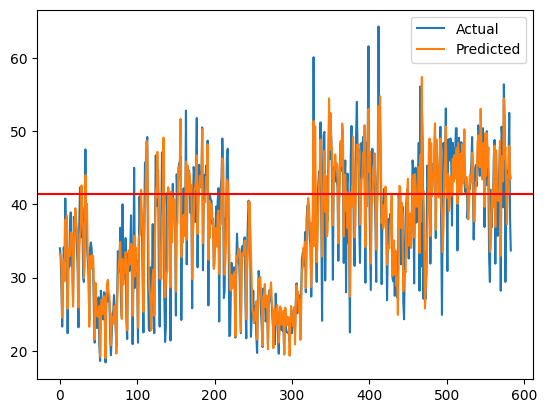

In [ ]:
cat_model = CatBoostRegressor()
cat_model.fit(x_train_sc, y_train)

# 예측 수행
y_pred = cat_model.predict(x_test_sc)

# 성능 평가
print('CatBoost MAE:', mean_absolute_error(y_test, y_pred))
print('CatBoost MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['catB'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['catB'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['catB'] = round(r2_score(y_test, y_pred), 3)
# 평균 값 계산
y_mean = y_train.mean()
print('평균 :', y_mean)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

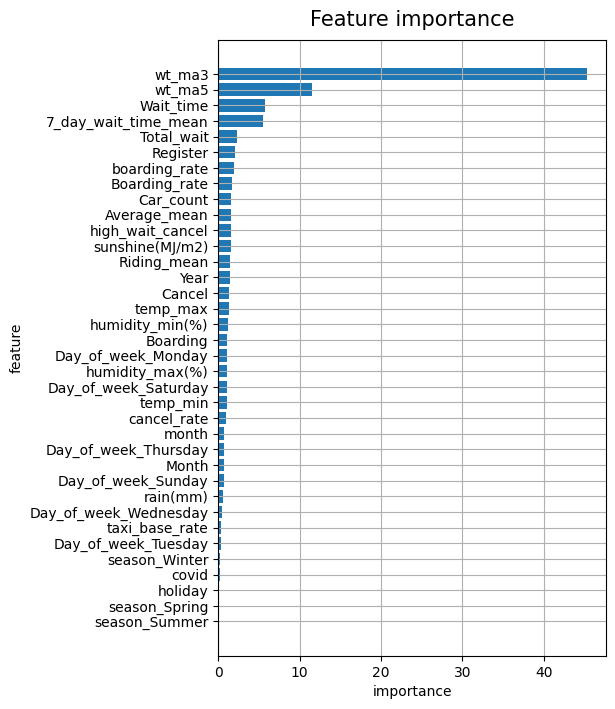

In [ ]:
# 변수 중요도 시각화
df = pd.DataFrame()
df['feature'] = list(x_train)
df['importance'] = cat_model.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)


plt.figure(figsize=(5,8))
plt.barh(df['feature'], df['importance'])
plt.title("Feature importance", size =15, pad=10)
plt.xlabel("importance")
plt.ylabel("feature")
plt.grid()
plt.show()

### svr

MAE: 4.242332999185088
MAPE: 0.11421325857276479
R2: 0.6169774496799194


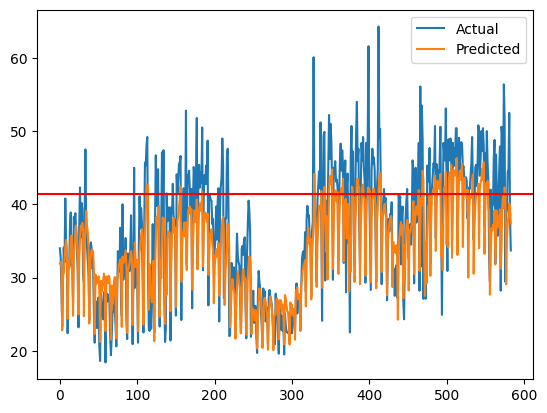

In [ ]:
svr_model = SVR()
svr_model.fit(x_train_sc, y_train)
y_pred = svr_model.predict(x_test_sc)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['SVM'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['SVM'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['SVM'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### AdaBoostRegressor

MAE: 4.26226437631111
MAPE: 0.13539596037250484
R2: 0.6350139883721909


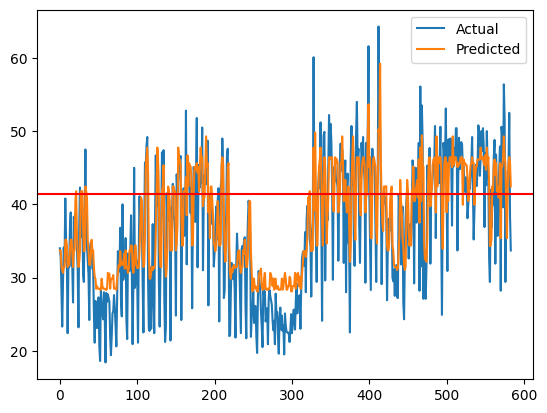

In [ ]:
ada_model = AdaBoostRegressor(random_state = 1)
ada_model.fit(x_train_sc, y_train)
y_pred = ada_model.predict(x_test_sc)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['AdaBoost'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['AdaBoost'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['AdaBoost'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### BaggingRegressor

MAE: 3.667585616438356
MAPE: 0.10543102811522344
R2: 0.7000073122006611


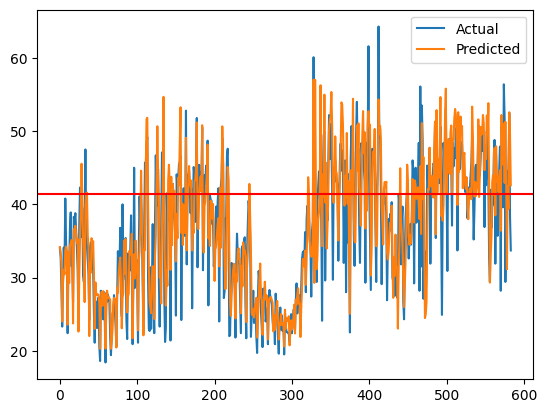

In [ ]:
bagging_model = BaggingRegressor(random_state=1)
bagging_model.fit(x_train_sc, y_train)
y_pred = bagging_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['BaggingRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['BaggingRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['BaggingRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### ExtraTreesRegressor

MAE: 2.856244863013701
MAPE: 0.08132125743003905
R2: 0.8054732951744783


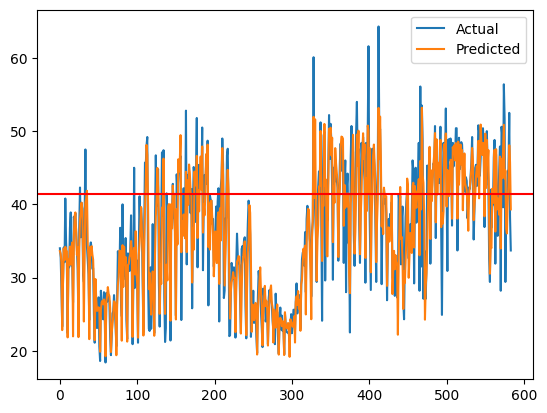

In [ ]:
EX_model = ExtraTreesRegressor(random_state=1)
EX_model.fit(x_train_sc, y_train)
y_pred = EX_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['ExtraTreesRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['ExtraTreesRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['ExtraTreesRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### GraientBoostingRegressor

MAE: 4.488564990503609
MAPE: 0.12568440492236663
R2: 0.5599185751010549


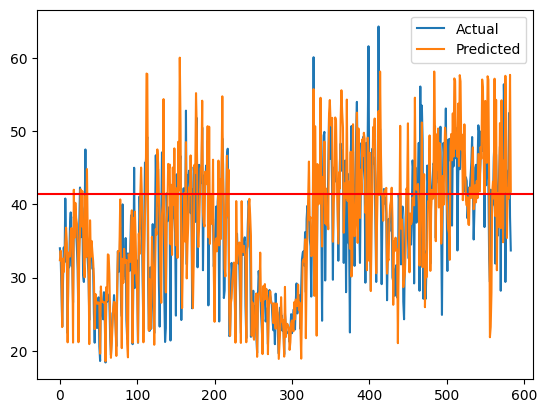

In [ ]:
GB_model = GradientBoostingRegressor(max_depth=15,
                                  random_state=1)
GB_model.fit(x_train_sc, y_train)
y_pred = GB_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['GradientBoostingRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['GradientBoostingRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['GradientBoostingRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

### VotingRegressor

MAE: 3.5768555912479645
MAPE: 0.09686206192550421
R2: 0.7335620060462227


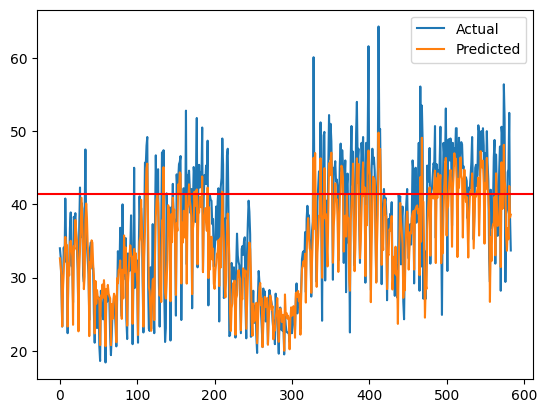

In [ ]:
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

voting_model = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])
voting_model.fit(x_train_sc, y_train)
y_pred = voting_model.predict(x_test_sc)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

result_MAE['VotingRegressor'] = round(mean_absolute_error(y_test, y_pred), 3)
result_MAPE['VotingRegressor'] = round(mean_absolute_percentage_error(y_test, y_pred), 3)
result_r2['VotingRegressor'] = round(r2_score(y_test, y_pred), 3)

# 예측 결과 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.axhline(y_mean, color='r')  # 평균선
plt.show()

## 모델별 성능 비교

In [ ]:
# 성능 비교
print('=' * 40)
print('mean_absolute_error 성능비교')
for m_name, score in result_MAE.items():
    print(m_name, score)
print('=' * 40)

mean_absolute_error 성능비교
Linear Regression 3.1
KNN 7.942
DecisionTreeRegressor 3.614
RF 3.456
XGB 3.494
LGB 3.053
RID 3.208
catB 2.983
SVM 4.242
AdaBoost 4.262
BaggingRegressor 3.668
ExtraTreesRegressor 2.856
GradientBoostingRegressor 4.489
VotingRegressor 3.577


In [ ]:
print('=' * 40)
print('mean_absolute_percentage_error 성능비교')
for m_name, score in result_MAPE.items():
    print(m_name, score)
print('=' * 40)

mean_absolute_percentage_error 성능비교
Linear Regression 0.091
KNN 0.203
DecisionTreeRegressor 0.105
RF 0.102
XGB 0.1
LGB 0.089
RID 0.096
catB 0.087
SVM 0.114
AdaBoost 0.135
BaggingRegressor 0.105
ExtraTreesRegressor 0.081
GradientBoostingRegressor 0.126
VotingRegressor 0.097


In [ ]:
print('=' * 40)
print('R2-score 성능비교')
for m_name, score in result_r2.items():
    print(m_name, score)
print('=' * 40)

R2-score 성능비교
Linear Regression 0.791
KNN -0.228
DecisionTreeRegressor 0.704
RF 0.736
XGB 0.713
LGB 0.785
RID 0.774
catB 0.803
SVM 0.617
AdaBoost 0.635
BaggingRegressor 0.7
ExtraTreesRegressor 0.805
GradientBoostingRegressor 0.56
VotingRegressor 0.734
